<a href="https://colab.research.google.com/github/ghazalna/Deep-Learning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries

import tensorflow as tf
from tensorflow.keras import layers,models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
## Suppress TensorFlow warnings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# Load and Preprocess MNIST Dataset

batch_size=100

In [4]:
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# Reshape and normalize the dataset

X_train = (X_train.reshape(-1, (28*28)).astype('float32') - 127.5) /127.5

In [8]:
X_train

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [9]:
# Create TensorFlow dataset

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1024).batch(batch_size)

In [10]:
dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)>

In [11]:
# Set Hyperparameters

mnist_dim = 28 * 28
n_g = 256
z_dim = 100
lr = 0.0002
n_epochs = 1

In [12]:
# Build Generator Model

def build_generator():
  model = models.Sequential()
  model.add(layers.Dense(n_g, input_dim = z_dim))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(n_g * 2))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(n_g * 4))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(mnist_dim, activation ='tanh'))
  return model

In [13]:
# Build Discriminator Model

def build_discriminator():
  model = models.Sequential()
  model.add(layers.Dense(n_g * 4, input_dim = mnist_dim))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(n_g * 2))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(n_g))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dense(1, activation ='sigmoid'))
  return model


In [14]:
# Create Generator and Discriminator Models

G = build_generator()
D = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile Discriminator

D. compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(lr))

In [16]:
# Build Combined Model

D.trainable = False

In [17]:
z = layers.Input(shape = (z_dim,))
img = G(z)
valid = D(img)
combined = models.Model(z, valid)
combined.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(lr))

In [18]:
# Training the GAN

loss_D_hist = []
loss_G_hist = []

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━

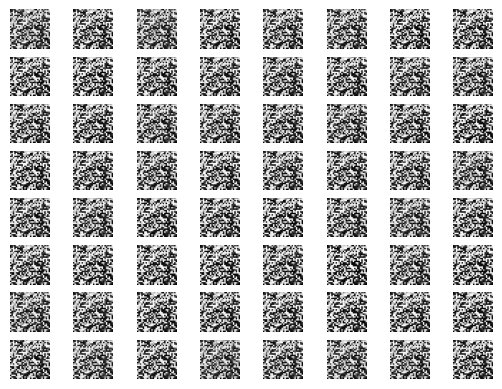

In [19]:
for epoch in range (n_epochs):
  loss_D_avg =[]
  loss_G_avg =[]
  for X_batch in dataset:
    batch_size = X_batch.shape[0]
    y_real = np.ones((batch_size, 1))
    y_fake = np.zeros((batch_size,1))

    # Generate fake images
    z = np.random.normal(0, 1, (batch_size, z_dim))
    X_fake = G.predict(z)


    # Train Discriminator
    D_loss_real = D.train_on_batch(X_batch, y_real)
    D_loss_fake = D.train_on_batch(X_fake, y_fake)
    D_loss = 0.5 * np.add(D_loss_real, D_loss_fake)
    loss_D_avg.append(D_loss)


    # Train Generator
    G_loss = combined.train_on_batch(z, y_real)
    loss_G_avg.append(G_loss)


  # Record the losses
  loss_D_hist.append(np.mean(loss_D_avg))
  loss_G_hist.append(np.mean(loss_G_avg))


  # Print loss per epoch
  print(f'Epoch {epoch + 1 } / {n_epochs}: D Loss: {np.mean(loss_D_avg):.4f}, G Loss: {np.mean(loss_G_avg):.4f}')

  # Generate and visualize images after each epoch
  z = np.random.normal(0, 1, (64, z_dim))
  generated_imgs = G.predict(z)
  generated_imgs = 0.5 * generated_imgs + 0.5  # Rescale to [0, 1]
  fig, axs = plt.subplots(8, 8)
  cnt = 0
  for i in range(8):
    for j in range(8):
      axs[cnt // 8 , cnt % 8 ].imshow(generated_imgs[cnt].reshape(28, 28), cmap='gray')
      axs[cnt // 8 , cnt % 8 ].axis('off')
      cnt += 1
  plt.show()

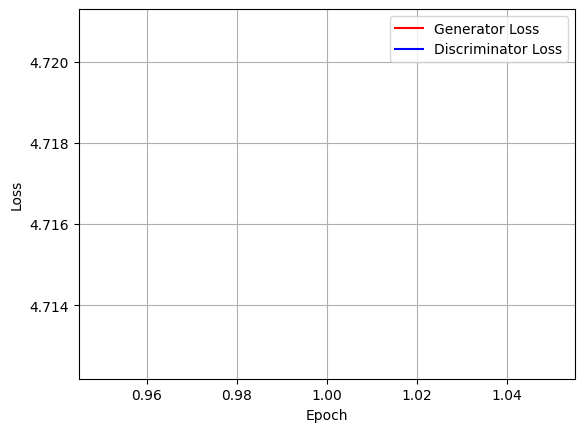

In [21]:
# Plot Loss Changes Over Epochs

plt.plot(range(1, n_epochs + 1), loss_G_hist,'r-', label='Generator Loss')
plt.plot(range(1, n_epochs + 1), loss_D_hist,'b-', label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()